## Bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
import numpy as np

## ***StratifiedKFold***

In [ ]:
# Crie os classificadores que você deseja avaliar
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Especifique o número de folds para o StratifiedKFold
n = 10
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=777)

# Crie listas para armazenar as acurácias de cada classificador
acc_knn = []
acc_rf = []

# Execute a validação cruzada e obtenha as acurácias para cada fold
for train_idx, test_idx in skf.split(X, Y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    y_pred1 = cross_val_predict(knn, X_train, y_train, cv=skf)
    accuracy1 = accuracy_score(y_train, y_pred1)
    acc_knn.append(accuracy1)

    y_pred2 = cross_val_predict(rf, X_train, y_train, cv=skf)
    accuracy2 = accuracy_score(y_train, y_pred2)
    acc_rf.append(accuracy2)

# Crie um DataFrame pandas com as acurácias
resultado = {
    'fold': range(1, n + 1),
    'acc_knn': acc_knn,
    'acc_rf': acc_rf
}

tabela_resultados = pd.DataFrame(resultado)
# Para ir adicionando na tabela use a função
# tabela_resultados = pd.concat([tabela_resultados, resultado2])

# Exiba o DataFrame
print(tabela_resultados)

## Análise Estatística dos Classificadores

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
tabela_resultados = pd.read_csv('/content/drive/MyDrive/DATASETS/checkpoint_resultados2.csv')

In [ ]:
resultado_knn = tabela_resultados['acc_knn']
resultado_rf = tabela_resultados['acc_rf']

In [ ]:
# Realize o teste de Wilcoxon
stat, p = wilcoxon(resultado_knn, resultado_rf)

# Imprima o valor p
print(f"Valor p: {p}")

# Verifique a significância estatística (geralmente um nível de significância de 0.05)
if p < 0.05:
    print("Diferença estatística significativa entre os classificadores.")
else:
    print("Não há diferença estatística significativa entre os classificadores.")

Valor p: 2.2633997828040994e-06
Diferença estatística significativa entre os classificadores.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


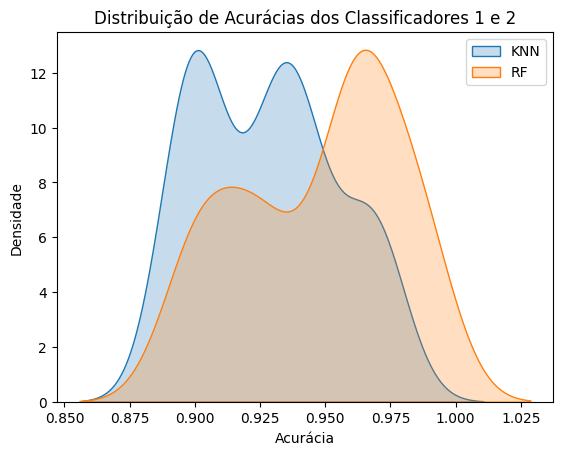

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Duas listas de acurácias para os dois classificadores
acuracias_classificador1 = resultado_knn  # Substitua com seus valores reais
acuracias_classificador2 = resultado_rf  # Substitua com seus valores reais

# Crie um gráfico de densidade (kdeplot) sobreposto para as duas distribuições
sns.kdeplot(acuracias_classificador1, label='KNN', fill=True)
sns.kdeplot(acuracias_classificador2, label='RF', fill=True)

# Defina rótulos e título
plt.xlabel('Acurácia')
plt.ylabel('Densidade')
plt.title('Distribuição de Acurácias dos Classificadores 1 e 2')

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()

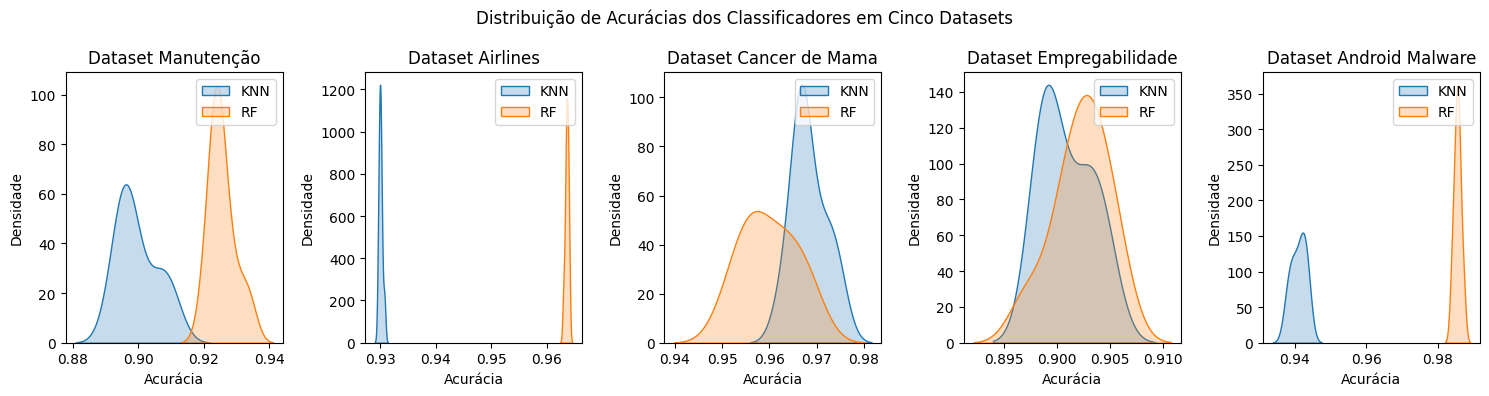

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cinco listas de acurácias para cada dataset
KNN1 = resultado_knn.iloc[0:9].tolist()
KNN2 = resultado_knn.iloc[10:19].tolist()
KNN3 = resultado_knn.iloc[20:29].tolist()
KNN4 = resultado_knn.iloc[30:39].tolist()
KNN5 = resultado_knn.iloc[40:49].tolist()
RF1 = resultado_rf.iloc[0:9].tolist()
RF2 = resultado_rf.iloc[10:19].tolist()
RF3 = resultado_rf.iloc[20:29].tolist()
RF4 = resultado_rf.iloc[30:39].tolist()
RF5 = resultado_rf.iloc[40:49].tolist()


# Crie uma figura com cinco subgráficos
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# Crie um gráfico de densidade (kdeplot) para cada dataset e classificador
sns.kdeplot(KNN1, ax=axes[0], label='KNN', fill=True)
sns.kdeplot(RF1, ax=axes[0], label='RF', fill=True)
axes[0].set_title('Dataset Manutenção')

sns.kdeplot(KNN2, ax=axes[1], label='KNN', fill=True)
sns.kdeplot(RF2, ax=axes[1], label='RF', fill=True)
axes[1].set_title('Dataset Airlines')

sns.kdeplot(KNN3, ax=axes[2], label='KNN', fill=True)
sns.kdeplot(RF3, ax=axes[2], label='RF', fill=True)
axes[2].set_title('Dataset Cancer de Mama')

sns.kdeplot(KNN4, ax=axes[3], label='KNN', fill=True)
sns.kdeplot(RF4, ax=axes[3], label='RF', fill=True)
axes[3].set_title('Dataset Empregabilidade')

sns.kdeplot(KNN5, ax=axes[4], label='KNN', fill=True)
sns.kdeplot(RF5, ax=axes[4], label='RF', fill=True)
axes[4].set_title('Dataset Android Malware')


# Defina rótulos e título para a figura
fig.suptitle('Distribuição de Acurácias dos Classificadores em Cinco Datasets')
for ax in axes:
    ax.set_xlabel('Acurácia')
    ax.set_ylabel('Densidade')
    ax.legend()

# Ajuste a disposição dos subgráficos
plt.tight_layout()

# Exiba a figura
plt.show()

# Datasets

## Dataset Manutenção

In [ ]:
dataManu = pd.read_csv('/content/drive/MyDrive/DATASETS/predictive_maintenance.csv')

In [ ]:
dataManu.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
colunas_para_remover = ['UDI', 'Product ID', 'Failure Type']
dataManu = dataManu.drop(colunas_para_remover, axis=1)

In [ ]:
dummy_quality = pd.get_dummies(dataManu['Type'], prefix='Quality')

In [ ]:
dataManu = pd.concat([dataManu,dummy_quality], axis=1)

In [ ]:
dataManu.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Quality_H,Quality_L,Quality_M
0,M,298.1,308.6,1551,42.8,0,0,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,0,1,0
2,L,298.1,308.5,1498,49.4,5,0,0,1,0
3,L,298.2,308.6,1433,39.5,7,0,0,1,0
4,L,298.2,308.7,1408,40.0,9,0,0,1,0


In [ ]:
dataManu = dataManu.drop('Type',axis=1)

In [ ]:
dataManu.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Quality_H,Quality_L,Quality_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0


In [ ]:
X = dataManu.drop(['Target'],axis=1)
Y = dataManu['Target']

In [ ]:
Y0 = X[Y==0]
Y1 = X[Y==1]

In [ ]:
Y0_under = Y0.sample(678)
Y0_under['TARGET'] = 0
Y1['TARGET'] = 1

<ipython-input-27-5ee392cfbcfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1['TARGET'] = 1


In [ ]:
Y_under = pd.concat([Y0_under,Y1], axis=0)

In [ ]:
smote = SMOTE()

In [ ]:
X_temp = Y_under.drop(['TARGET'],axis=1)
Y_temp = Y_under['TARGET']

In [ ]:
X_smote, Y_smote = smote.fit_resample(X_temp,Y_temp)

In [ ]:
Y_smote.value_counts()

0    678
1    678
Name: TARGET, dtype: int64

In [ ]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_smote)

In [ ]:
# Crie os classificadores que você deseja avaliar
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Especifique o número de folds para o StratifiedKFold
n = 10
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=777)

# Crie listas para armazenar as acurácias de cada classificador
acc_knn = []
acc_rf = []

# Execute a validação cruzada e obtenha as acurácias para cada fold
for train_idx, test_idx in skf.split(X_norm, Y_smote):
    X_train, X_test = X_norm[train_idx], X_norm[test_idx]
    y_train, y_test = Y_smote[train_idx], Y_smote[test_idx]

    y_pred1 = cross_val_predict(knn, X_train, y_train, cv=skf)
    accuracy1 = accuracy_score(y_train, y_pred1)
    acc_knn.append(accuracy1)

    y_pred2 = cross_val_predict(rf, X_train, y_train, cv=skf)
    accuracy2 = accuracy_score(y_train, y_pred2)
    acc_rf.append(accuracy2)

# Crie um DataFrame pandas com as acurácias
resultado = {
    'fold': range(1, n + 1),
    'acc_knn': acc_knn,
    'acc_rf': acc_rf
}

tabela_resultados = pd.DataFrame(resultado)

# Exiba o DataFrame
print(tabela_resultados)

IndentationError: ignored

## Dataset Airlines

In [ ]:
parte1 = pd.read_csv('/content/drive/MyDrive/DATASETS/test.csv')
parte2 = pd.read_csv('/content/drive/MyDrive/DATASETS/train.csv')
dataAir = pd.concat([parte1, parte2], axis = 0)

In [ ]:
dataAir.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
dataAir = dataAir.drop('Unnamed: 0', axis=1)
dataAir = dataAir.drop('id', axis=1)

In [ ]:
dataAir.columns = [c.replace(' ', '_') for c in dataAir.columns]

In [ ]:
#Transformando nosso target de objeto [neutro, nao satisfeito e satisfeito] para binário [0: neutro ou nao satisfeito, 1: satisfeito]

dataAir['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

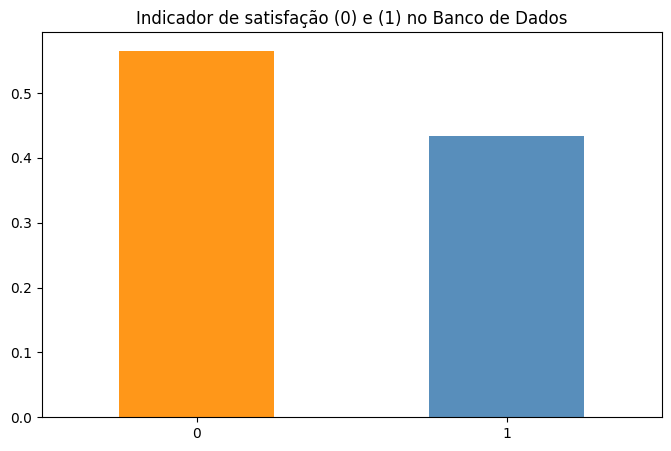

In [ ]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
dataAir.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Indicador de satisfação (0) e (1) no Banco de Dados')
plt.show()

In [ ]:
# Missing data
total = dataAir.isnull().sum().sort_values(ascending=False)
percent = (dataAir.isnull().sum()/dataAir.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,393,0.003026
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


In [ ]:
# Imputing missing value with mean
dataAir['Arrival_Delay_in_Minutes'] = dataAir['Arrival_Delay_in_Minutes'].fillna(dataAir['Arrival_Delay_in_Minutes'].mean())

In [ ]:
#Transformando as colunas de objeto em númericas usando dummies

dummy_customer_type = pd.get_dummies(dataAir['Customer_Type'], prefix='Customer_type')
dataAir = pd.concat([dataAir,dummy_customer_type], axis=1)

dummy_gender = pd.get_dummies(dataAir['Gender'], prefix='Gender')
dataAir = pd.concat([dataAir,dummy_gender], axis=1)

dummy_Type_of_Travel = pd.get_dummies(dataAir['Type_of_Travel'], prefix='Travel_type')
dataAir = pd.concat([dataAir,dummy_Type_of_Travel], axis=1)

dummy_class = pd.get_dummies(dataAir['Class'], prefix='Class')
dataAir = pd.concat([dataAir,dummy_class], axis=1)

In [ ]:
dataAir = dataAir.drop('Customer_Type', axis=1)
dataAir = dataAir.drop('Gender', axis=1)
dataAir = dataAir.drop('Type_of_Travel', axis=1)
dataAir = dataAir.drop('Class', axis=1)

In [ ]:
X_Air = dataAir.drop(['satisfaction'],axis=1)
Y_Air = dataAir['satisfaction']

In [ ]:
scaler = MinMaxScaler()
X_Air_norm = scaler.fit_transform(X_Air)

In [ ]:
# Crie os classificadores que você deseja avaliar
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Especifique o número de folds para o StratifiedKFold
n = 10
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=777)

# Crie listas para armazenar as acurácias de cada classificador
acc_knn = []
acc_rf = []

# Execute a validação cruzada e obtenha as acurácias para cada fold
for train_idx, test_idx in skf.split(X_Air_norm, Y_Air):
    X_train, X_test = X_Air_norm[train_idx], X_Air_norm[test_idx]
    y_train, y_test = Y_Air.iloc[train_idx], Y_Air.iloc[test_idx]

    y_pred1 = cross_val_predict(knn, X_train, y_train, cv=skf)
    accuracy1 = accuracy_score(y_train, y_pred1)
    acc_knn.append(accuracy1)

    y_pred2 = cross_val_predict(rf, X_train, y_train, cv=skf)
    accuracy2 = accuracy_score(y_train, y_pred2)
    acc_rf.append(accuracy2)

# Crie um DataFrame pandas com as acurácias
resultado2 = {
    'fold': range(1, n + 1),
    'acc_knn': acc_knn,
    'acc_rf': acc_rf
}

tabela_resultados = pd.concat([tabela_resultados, pd.DataFrame(resultado2)])

# Exiba o DataFrame
print(tabela_resultados)

   fold   acc_knn    acc_rf
0     1  0.895902  0.926230
1     2  0.898361  0.920492
2     3  0.896721  0.923770
3     4  0.904098  0.929508
4     5  0.895902  0.923770
5     6  0.908197  0.933607
6     7  0.892711  0.925471
7     8  0.909910  0.923833
8     9  0.895987  0.923014
9    10  0.903358  0.932023
0     1  0.930047  0.963693
1     2  0.929764  0.963787
2     3  0.929952  0.963496
3     4  0.929644  0.963488
4     5  0.930269  0.963590
5     6  0.930731  0.963992
6     7  0.929961  0.963009
7     8  0.930192  0.963898
8     9  0.929901  0.963334
9    10  0.930560  0.963967


## Dataset Cancer de Mama

In [ ]:
dataCancer = pd.read_csv('/content/drive/MyDrive/DATASETS/breast-cancer.csv')

In [ ]:
dataCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataCancer = dataCancer.drop('id', axis=1)

In [ ]:
dataCancer['diagnosis'] = dataCancer['diagnosis'].replace({'M': 1, 'B': 0})

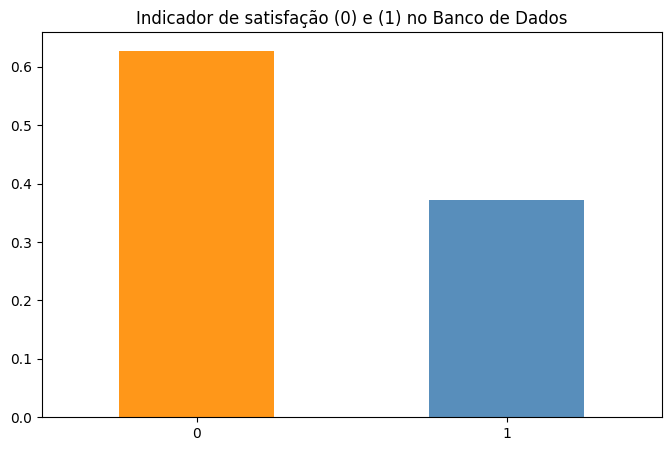

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
dataCancer.diagnosis.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Indicador de satisfação (0) e (1) no Banco de Dados')
plt.show()

In [ ]:
x = dataCancer.drop(['diagnosis'], axis=1)
y = dataCancer['diagnosis']

In [ ]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

In [ ]:
# Crie os classificadores que você deseja avaliar
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Especifique o número de folds para o StratifiedKFold
n = 10
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=777)

# Crie listas para armazenar as acurácias de cada classificador
acc_knn = []
acc_rf = []

# Execute a validação cruzada e obtenha as acurácias para cada fold
for train_idx, test_idx in skf.split(x_norm, y):
    X_train, X_test = x_norm[train_idx], x_norm[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    y_pred1 = cross_val_predict(knn, X_train, y_train, cv=skf)
    accuracy1 = accuracy_score(y_train, y_pred1)
    acc_knn.append(accuracy1)

    y_pred2 = cross_val_predict(rf, X_train, y_train, cv=skf)
    accuracy2 = accuracy_score(y_train, y_pred2)
    acc_rf.append(accuracy2)

# Crie um DataFrame pandas com as acurácias
resultado3 = {
    'fold': range(1, n + 1),
    'acc_knn': acc_knn,
    'acc_rf': acc_rf
}

tabela_resultados = pd.concat([tabela_resultados, pd.DataFrame(resultado3)])

# Exiba o DataFrame
print(tabela_resultados)

   fold   acc_knn    acc_rf
0     1  0.895902  0.926230
1     2  0.898361  0.920492
2     3  0.896721  0.923770
3     4  0.904098  0.929508
4     5  0.895902  0.923770
5     6  0.908197  0.933607
6     7  0.892711  0.925471
7     8  0.909910  0.923833
8     9  0.895987  0.923014
9    10  0.903358  0.932023
0     1  0.930047  0.963693
1     2  0.929764  0.963787
2     3  0.929952  0.963496
3     4  0.929644  0.963488
4     5  0.930269  0.963590
5     6  0.930731  0.963992
6     7  0.929961  0.963009
7     8  0.930192  0.963898
8     9  0.929901  0.963334
9    10  0.930560  0.963967
0     1  0.962891  0.962891
1     2  0.966797  0.958984
2     3  0.966797  0.955078
3     4  0.966797  0.966797
4     5  0.966797  0.955078
5     6  0.970703  0.957031
6     7  0.966797  0.962891
7     8  0.974609  0.968750
8     9  0.972656  0.951172
9    10  0.966862  0.959064


In [ ]:
#checkpoint
tabela_resultados.to_csv('/content/drive/MyDrive/DATASETS/checkpoint_resultados.csv', index=False)  # Use o nome do arquivo desejado

## Dataset Empregabilidade

In [ ]:
dataTitanic = pd.read_csv('/content/drive/MyDrive/DATASETS/Student-Employability-Datasets.csv')

In [ ]:
dataTitanic.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [ ]:
dataTitanic.columns = [c.replace(' ', '_') for c in dataTitanic.columns]

In [ ]:
#Transformando nosso target de objeto para binário

dataTitanic['CLASS'].replace({'LessEmployable': 0, 'Employable': 1},inplace = True)

In [ ]:
dataTitanic.head()

,Name_of_Student,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,Student_Performance_Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,1
1,Student 2,4,4,4,4,4,4,3,5,1
2,Student 3,4,3,3,3,3,3,2,5,0
3,Student 4,3,3,3,2,3,3,3,5,0
4,Student 5,4,4,3,3,4,4,3,5,1


In [ ]:
dataTitanic = dataTitanic.drop('Name_of_Student', axis = 1)

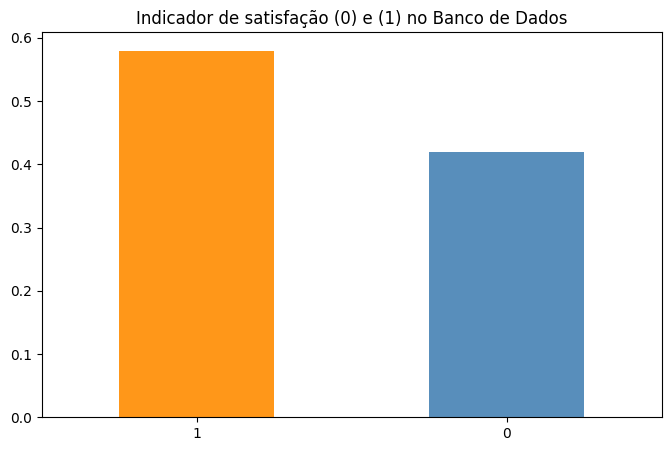

In [ ]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
dataTitanic.CLASS.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Indicador de satisfação (0) e (1) no Banco de Dados')
plt.show()

In [ ]:
X = dataTitanic.drop(['CLASS'],axis=1)
Y = dataTitanic['CLASS']

In [ ]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
# Crie os classificadores que você deseja avaliar
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Especifique o número de folds para o StratifiedKFold
n = 10
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=777)

# Crie listas para armazenar as acurácias de cada classificador
acc_knn = []
acc_rf = []

# Execute a validação cruzada e obtenha as acurácias para cada fold
for train_idx, test_idx in skf.split(X_norm, Y):
    X_train, X_test = X_norm[train_idx], X_norm[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    y_pred1 = cross_val_predict(knn, X_train, y_train, cv=skf)
    accuracy1 = accuracy_score(y_train, y_pred1)
    acc_knn.append(accuracy1)

    y_pred2 = cross_val_predict(rf, X_train, y_train, cv=skf)
    accuracy2 = accuracy_score(y_train, y_pred2)
    acc_rf.append(accuracy2)

# Crie um DataFrame pandas com as acurácias
resultado4 = {
    'fold': range(1, n + 1),
    'acc_knn': acc_knn,
    'acc_rf': acc_rf
}

tabela_resultados = pd.concat([tabela_resultados, pd.DataFrame(resultado4)])

# Exiba o DataFrame
print(resultado4)

## Dataset Android Malware

In [ ]:
dataAndroid = pd.read_csv('/content/drive/MyDrive/DATASETS/TUANDROMD.csv')

In [ ]:
dataAndroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(241), object(1)
memory usage: 8.2+ MB


In [ ]:
dataAndroid.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [ ]:
#Transformando nosso target de objeto para binário

dataAndroid['Label'].replace({'goodware': 0, 'malware': 1},inplace = True)

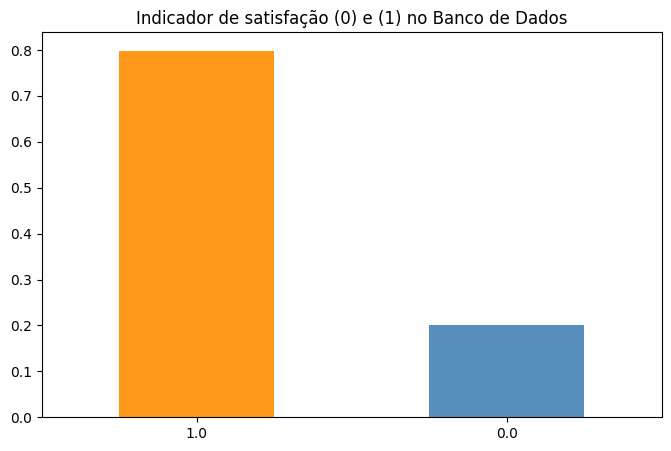

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
dataAndroid.Label.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Indicador de satisfação (0) e (1) no Banco de Dados')
plt.show()

In [ ]:
X = dataAndroid.drop(['Label'],axis=1)
Y = dataAndroid['Label']

In [ ]:
Y0 = X[Y==0]
Y1 = X[Y==1]

In [ ]:
Y.value_counts()

1.0    3565
0.0     899
Name: Label, dtype: int64

In [ ]:
Y1_under = Y1.sample(1798)
Y1_under['TARGET'] = 1
Y0['TARGET'] = 0

<ipython-input-45-b931d43ee889>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y0['TARGET'] = 0


In [ ]:
Y_under = pd.concat([Y1_under,Y0], axis=0)

In [ ]:
X2 = Y_under.drop(['TARGET'],axis=1)
Y2 = Y_under.reset_index(drop=True)['TARGET']
X2 = X2.reset_index(drop=True)

In [ ]:
import numpy as np

def select_best_features(X2, Y2, threshold=0.5):
    """
    Seleciona os melhores atributos usando correlação com a variável alvo.

    Args:
        X (pd.DataFrame): DataFrame com os atributos.
        y (pd.Series): Série com a variável alvo.
        threshold (float): Valor mínimo de correlação aceitável.

    Returns:
        selected_features (list): Lista com os nomes dos atributos selecionados.
    """
    # Concatena X e y para calcular as correlações
    data = pd.concat([X2, pd.DataFrame(Y2)], axis=1)

    # Calcula as correlações entre os atributos e a variável alvo
    m_cor = data.corr()

    m_cor.columns = np.append(X2.columns.tolist(), 'TARGET')

    correlations = m_cor['TARGET']

    # Seleciona os atributos com correlação acima do threshold
    selected_features = correlations[abs(correlations) >= threshold].index.tolist()

    return selected_features

In [ ]:
bf = select_best_features(X2, Y2, 0.2)
bf.remove('TARGET')

In [ ]:
X3 = X2[bf]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X2, Y2, test_size=0.3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9814814814814815

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X3, Y2, test_size=0.3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.971604938271605

Isso mostra que com as melhores features nosso classificador obteve uma precisão semelhante, podemos seguir com estas

In [ ]:
# Crie os classificadores que você deseja avaliar
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Especifique o número de folds para o StratifiedKFold
n = 10
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=777)

# Crie listas para armazenar as acurácias de cada classificador
acc_knn = []
acc_rf = []

# Execute a validação cruzada e obtenha as acurácias para cada fold
for train_idx, test_idx in skf.split(X3, Y2):
    X_train, X_test = X3.iloc[train_idx], X3.iloc[test_idx]
    y_train, y_test = Y2[train_idx], Y2[test_idx]

    y_pred1 = cross_val_predict(knn, X_train, y_train, cv=skf)
    accuracy1 = accuracy_score(y_train, y_pred1)
    acc_knn.append(accuracy1)

    y_pred2 = cross_val_predict(rf, X_train, y_train, cv=skf)
    accuracy2 = accuracy_score(y_train, y_pred2)
    acc_rf.append(accuracy2)

# Crie um DataFrame pandas com as acurácias
resultado5 = {
    'fold': range(1, n + 1),
    'acc_knn': acc_knn,
    'acc_rf': acc_rf
}

tabela_resultados = pd.concat([tabela_resultados, pd.DataFrame(resultado5)])

# Exiba o DataFrame
print(tabela_resultados)

In [ ]:
#checkpoint
tabela_resultados.to_csv('/content/drive/MyDrive/DATASETS/checkpoint_resultados2.csv', index=False)  # Use o nome do arquivo desejado